# 2 Flows on the line
---

**Overview**

- [2.0 Introduction](#2.0-Introduction)
- [2.1 A Geometric way of Thinking](#2.1-A-Geometric-way-of-Thinking)
- [2.2 Fixed Points and Stability](#2.2-Fixed-Points-and-Stability)
    - [Example 2.2.1](#Example-2.2.1)
    - [Example 2.2.2](#Example-2.2.2)
    - [Example 2.2.3](#Example-2.2.3)
- [2.3 Population Growth](#2.3-Population-Growth)
    - [Critique of the Logistic Model](#Critique-of-the-Logistic-Model)
- [2.4 Linear Stability Analysis](#2.4-Linear-Stability-Analysis)
    - [Example 2.4.1](#Example-2.4.1)
- [2.5 Existence and Uniquness](#2.5-Existence-and-Uniquness)
    - [Example 2.5.1](#Example-2.5.1)
    - [Example 2.5.2](#Example-2.5.2)
- [2.6 Impossibility of Oscillations](#2.6-Impossibility-of-Oscillations)
    - [Mechanical Analog: Overdamped Systems](#Mechanical-Analog:-Overdamped-Systems)
- [2.7 Potentials](#2.7-Potentials)
    - [Example 2.7.1](#Example-2.7.1)
- [2.8 Solving Equations on the Computer](#2.8-Solving-Equations-on-the-Computer)
    - [Euler's Method](#Euler's-Method)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 2.0 Introduction
---

$$
\begin{align*}
\dot{x}_1 &= f_1(x_1, \cdots, x_n) \\
& \vdots \\
\dot{x}_n &= f_n(x_1, \cdots, x_n)
\end{align*}
$$

$n = 1$

$$\dot{x} = f(x)$$

**one-dimensinal** / **first-order system**


## 2.1 A Geometric way of Thinking
---

$$\dot{x} = \sin x$$
(1)

$$dt = \frac{dx}{\sin x}$$

implies: 
$$
\begin{align*}
t &= \int \csc x \, \mathrm{d}x \\
&= - \ln |\csc x + \cot x | + C
\end{align*}
$$

$$t = \ln \Big|\frac{\csc x_0 + \cot x_0}{\csc x + \cot x}\Big|$$
(2)



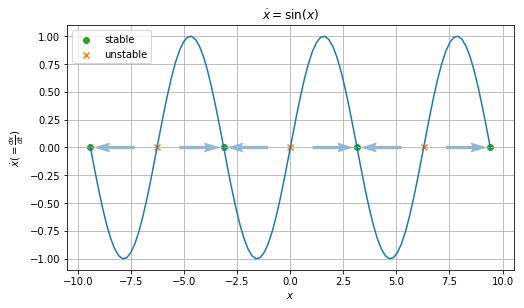

In [4]:
import matplotlib.pyplot as plt
import numpy as np

pi = np.pi

def f(x):
    x_ = np.sin(x)
    return x_

x = np.linspace(-pi*3, pi*3, num=100)
x_dot = f(x)

plt.figure(figsize=(8, 4.5))

plt.plot(x, f(x))

stable = np.arange(-pi*3, pi*4, pi*2)
plt.scatter(stable, f(stable), marker='o', label='stable', c=c[2])

unstable = np.arange(-pi*2, pi*3, pi*2)
plt.scatter(unstable, f(unstable), marker='x', label='unstable', c=c[1])


# flow_pos = np.arange(-pi*3/2, pi*7/2, pi*2)
# plt.scatter(flow_pos, np.repeat(0, len(flow_pos)), marker='>', c='darkblue')

# flow_neg = np.arange(-pi*5/2, pi*5/2, pi*2)
# plt.scatter(flow_neg, np.repeat(0, len(flow_neg)), marker='<', c='darkblue')

x_flow = np.linspace(-pi*3, pi*3, 10)
y_flow = np.repeat(0, len(x_flow))
l_flow = f(x_flow)
plt.quiver(x_flow, y_flow, l_flow, 0, alpha=.5, color=c[0])
            
plt.title(r'$\dot{x} = \sin(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x} (= \frac{dx}{dt})$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

**fixed point**
- **stable**
- **unstable**

## 2.2 Fixed Points and Stability
---

- **phase point**: imaginary point
- **phase portrait**: qualitatively different trajectories

### Example 2.2.1

$$\dot{x} = x^2 - 1$$

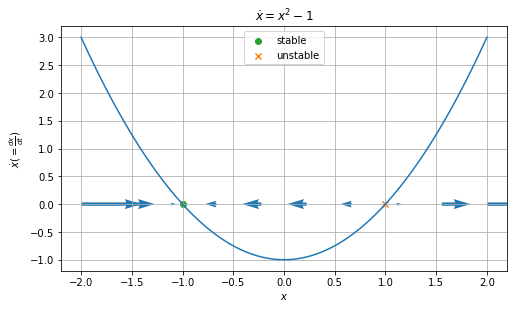

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    x_ = x**2 - 1
    return x_

x = np.linspace(-2, 2, 100)
x_dot = f(x)

plt.figure(figsize=(8, 4.5))

stable = -1
plt.scatter(stable, f(stable), label='stable', marker='o', c=c[2])

unstable = 1
plt.scatter(unstable, f(unstable), label='unstable', marker='x', c=c[1])

x_flow = np.linspace(-2, 2, 10)
y_flow = np.repeat(0, len(x_flow))
l_flow = f(x_flow)
plt.quiver(x_flow, y_flow, l_flow, 0, color=c[0])

plt.plot(x, x_dot)
plt.title(r'$\dot{x} = x^2 - 1$')
plt.legend(loc='upper center')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x} (= \frac{dx}{dt})$')
plt.grid(True)
plt.show()

### Example 2.2.2

$$-V_0 + RI + \frac{Q}{C} = 0$$
$$\dot{Q} = I$$

$$- V_0 + R\dot{Q} + \frac{Q}{C} = 0$$
$$\dot{Q} = f(Q) = \frac{V_0}{R} - \frac{Q}{RC}$$



### Example 2.2.3

$$\dot{x} = x - \cos x$$



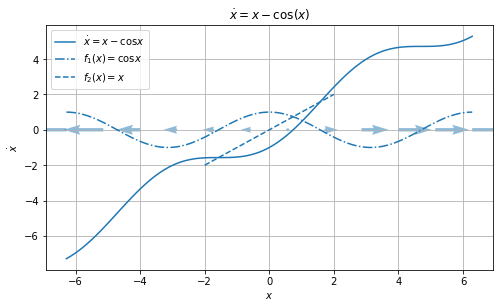

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = x - np.cos(x)
    return y

def f_1(x):
    y = np.cos(x)
    return y

def f_2(x):
    y = x
    return y

plt.figure(figsize=(8, 4.5))

x = np.linspace(-np.pi*2, np.pi*2, 100)
y = f(x)
plt.plot(x, y, label=r'$\dot{x} = x - \cos x$', c=c[0])

x_1 = np.linspace(-np.pi*2, np.pi*2, 100)
y_1 = f_1(x_1)
plt.plot(x_1, y_1, label=r'$f_1(x) = \cos x$', linestyle=l[2], c=c[0])

x_2 = np.linspace(-2, 2, 100)
y_2 = f_2(x_2)
plt.plot(x_2, y_2, label=r'$f_2(x) = x$', linestyle=l[1], c=c[0])

x_flow = np.linspace(-np.pi*2, np.pi*2, 12)
y_flow = np.repeat(0, len(x_flow))
l_flow = f(x_flow)
plt.quiver(x_flow, y_flow, l_flow, 0, color=c[0], alpha=.5)

plt.title(r'$\dot{x} = x - \cos(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## 2.3 Population Growth
---

$$\dot{N} = rN$$

$$N(t) = N_0e^rt$$

**Carrying capacity**: $K$

**Logistic eq**
$$\dot{N} = rN \Big(1 - \frac{N}{K} \Big)$$

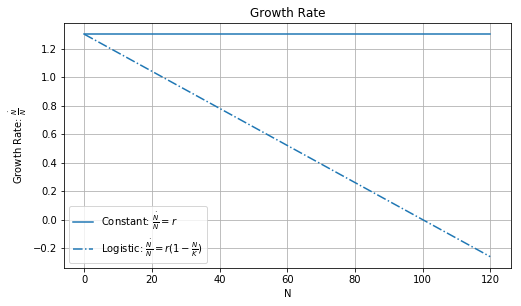

In [10]:
import matplotlib.pyplot as plt
import numpy as np

r = 1.3
K = 100

N = np.linspace(0, 120, 100)

plt.figure(figsize=(8, 4.5))

plt.plot(N, np.repeat(r, len(N)), label='Constant: ' r'$\frac{\dot{N}}{N} = r$')

def GR(N, r, K):
    rate = r * (1 - N/K)
    return rate

rate = GR(N, r, K)

plt.plot(N, rate, label='Logistic: ' r'$\frac{\dot{N}}{N} = r(1 - \frac{N}{K})$', linestyle=l[2], c=c[0])

plt.xlabel('N')
plt.ylabel('Growth Rate: ' r'$\frac{\dot{N}}{N}$')
plt.grid(True)
plt.legend(loc='lower left')
plt.title('Growth Rate')
plt.show()

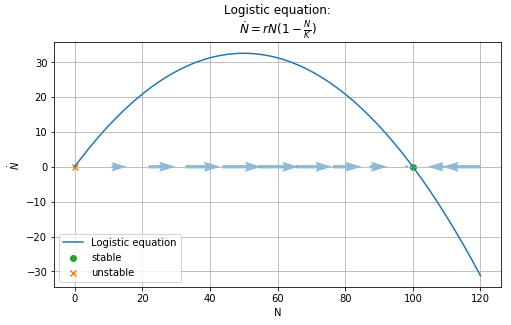

In [12]:
import matplotlib.pyplot as plt
import numpy as np

r = 1.3
K = 100

def logistic(x, r, K):
    y = r * x * (1 - x / K)
    return y

N = np.linspace(0, 120, 100)
N_dot = logistic(N, r=r, K=K)

plt.figure(figsize=(8, 4.5))

stable = K
plt.scatter(stable, logistic(stable, r=r, K=K), label='stable', marker='o', c=c[2])

unstable = 0
plt.scatter(unstable, logistic(unstable, r=r, K=K), label='unstable', marker='x', c=c[1])

plt.plot(N, N_dot, label='Logistic equation')

x_flow = np.linspace(0, 120, 12)
y_flow = np.repeat(0, len(x_flow))
l_flow = logistic(x_flow, r=r, K=K)
plt.quiver(x_flow, y_flow, l_flow, 0, alpha=.5, color=c[0])

plt.title('Logistic equation:\n'
          r'$\dot{N} = rN (1 - \frac{N}{K} )$')
plt.xlabel('N')
plt.ylabel(r'$\dot{N}$')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

### Critique of the Logistic Model

## 2.4 Linear Stability Analysis
---

Let 
- $x\ast$: fixed point

$$\eta(t) = x(t) - x\ast$$

$$\dot{\eta} = \frac{d}{dt} (x - x\ast) = \dot{x}$$

- $x\ast$: constant

$$\dot{\eta} = \dot{x} = f(x) = f(x\ast + \eta)$$

Taylor's expansion:
$$f(x\ast + \eta) = f(x\ast) + \eta f'(x\ast) + O(\eta^2)$$

- $O(\eta^2)$: quadratically small term in $\eta$

$$\dot{\eta} = \eta f'(x\ast) + O(\eta^2)$$

$$\dot{\eta} \approx \eta f'(x\ast)$$



### Example 2.4.1

using linear stability analysis:
$$\dot{x} = \sin x$$

*Solution:*

$$
\begin{align*}
f'(x*) 
&= \cos k\pi \\
&=
\begin{cases}
1, &\quad k \, \text{even} \\
-1, &\quad k \, \text{odd}
\end{cases}
\end{align*}$$

### Example 2.4.2

using linear stability analysis 

*Solution:*

$$f(N) = rN(1 - \frac{N}{K})$$

$N* = 0$, $N* = K$

$$f'(N) = r - \frac{2rN}{K}$$

$f'(0)=r$, $f'(K)=-r$

### Example 2.4.3

1. $\dot{x} = - x^3$
2. $\dot{x} = x^3$
3. $\dot{x} = x^2$
4. $\dot{x} = 0$



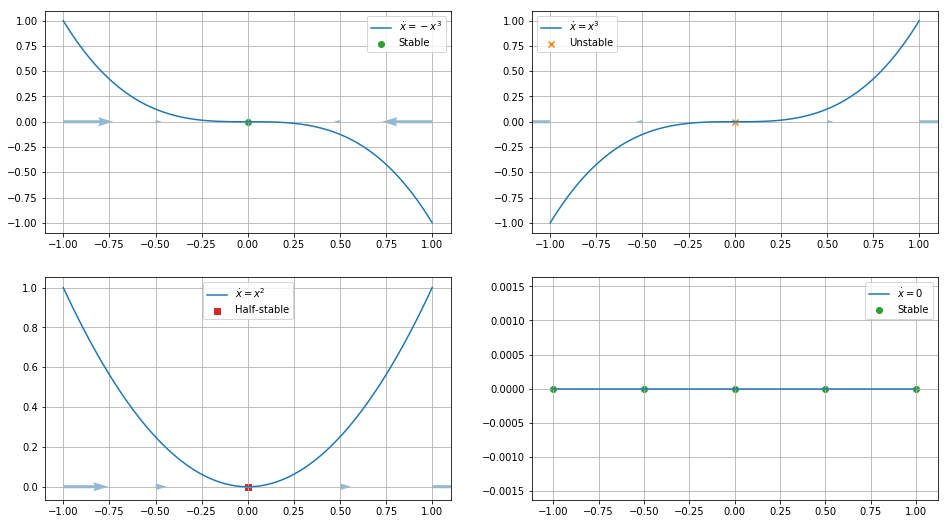

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def f_1(x):
    y = - x**3
    return y

def f_2(x):
    y = x**3
    return y

def f_3(x):
    y = x**2
    return y

def f_4(x):
    y = 0
    return y

def flow(x1, x2, num):
    x_flow = np.linspace(x1, x2, num)
    y_flow = np.repeat(0, len(x_flow))
    l_flow = f(x_flow)
    plt.quiver(x_flow, y_flow, l_flow, 0)

x = np.linspace(-1, 1, 100)
y_1 = f_1(x)
y_2 = f_2(x)
y_3 = f_3(x)
# y_4 = f_4(x)

x_f = np.linspace(-1, 1, 5)
y_1_f = f_1(x_f)
y_2_f = f_2(x_f)
y_3_f = f_3(x_f)

fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# for ax in axes


# plt.figure()

# plt.subplot(2, 2, 1)
axes[0, 0].plot(x, y_1, label=r'$\dot{x} = - x^3$')
axes[0, 0].quiver(x_f, np.repeat(0, len(x_f)), y_1_f, 0, color=c[0], alpha=.5)
axes[0, 0].scatter(0, 0, marker='o', label='Stable', c=c[2])
# axes[0, 0].set(ylabel=r'$\dot{x}$', title=r'$\dot{x} = - x^3$')
# axes[0, 0].xlabel(r'$x$')
# axes[0, 0].ylabel(r'$\dot{x}$')
# axes[0, 0].title(r'$\dot{x} = - x^3$')
axes[0, 0].grid(True)
axes[0, 0].legend(loc='best')

# plt.subplot(2, 2, 2)
axes[0, 1].plot(x, y_2, label=r'$\dot{x} = x^3$')
axes[0, 1].quiver(x_f, np.repeat(0, len(x_f)), y_2_f, 0, color=c[0], alpha=.5)
axes[0, 1].scatter(0, 0, marker='x', label='Unstable', c=c[1])
# axes[0, 1].set(title=r'$\dot{x} = x^3$')
# axes[0, 1].xlabel(r'$x$')
# axes[0, 1].ylabel(r'$\dot{x}$')
# axes[0, 1].title(r'$\dot{x} = x^3$')
axes[0, 1].grid(True)
axes[0, 1].legend(loc='best')

# plt.subplot(2, 2, 3)
axes[1, 0].plot(x, y_3, label=r'$\dot{x} = x^2$')
axes[1, 0].quiver(x_f, np.repeat(0, len(x_f)), y_3_f, 0, color=c[0], alpha=.5)
axes[1, 0].scatter(0, 0, marker='s', label='Half-stable', c=c[3])
# axes[1, 0].set(ylabel=r'$\dot{x}$', title=r'$\dot{x} = x^2$')
# axes[1, 0].xlabel(r'$x$')
# axes[1, 0].ylabel(r'$\dot{x}$')
# axes[1, 0].title(r'$\dot{x} = x^2$')
axes[1, 0].grid(True)
axes[1, 0].legend(loc='best')

# plt.subplot(2, 2, 4)
axes[1, 1].plot(x, np.repeat(0, len(x)), label=r'$\dot{x} = 0$')
# axes[1, 1].quiver(x, np.repeat(0, len(x)), y_1, 0)
axes[1, 1].scatter(x_f, np.repeat(0, len(x_f)), marker='o', label='Stable', c=c[2])
# axes[1, 1].set(xlabel=r'$x$', title=r'$\dot{x} = 0$')
# axes[1, 1].xlabel(r'$x$')
# axes[1, 1].ylabel(r'$\dot{x}$')
# axes[1, 1].title(r'$\dot{x} = 0$')
axes[1, 1].grid(True)
axes[1, 1].legend(loc='best')

# fig.set(xlabel=r'$x$', ylabel=r'$\dot{x}$')

# plt.tight_layout()
plt.show()

## 2.5 Existence and Uniquness
---

$\dot{x} = f(x)$

### Example 2.5.1

$$\dot{x} = x^{\frac{1}{3}}$$

*Solution:*

$$\int x^{-\frac{1}{3}} dx = \int dt$$

$$\frac{3}{2} x^{\frac{2}{3}} = t + C$$



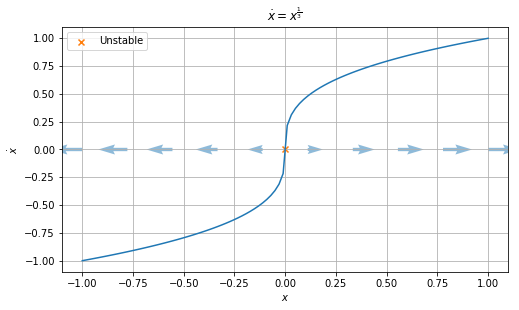

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# def f_inv(y):
#     x = y**3
#     return x

def f(x):
    x_abs = np.absolute(x)
    y_abs = x_abs**(1/3)
    y = y_abs * np.sign(x)
    return y

x = np.linspace(-1, 1, 100)

x_f = np.linspace(-1, 1, 10)

plt.figure(figsize=(8, 4.5))

plt.plot(x, f(x))
plt.quiver(x_f, np.repeat(0, len(x_f)), f(x_f), 0, color=c[0], alpha=.5)
plt.scatter(0, 0, marker='x', label='Unstable', c=c[1])
plt.title(r'$\dot{x} = x^{\frac{1}{3}}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Example 2.5.2

$$\dot{x} = 1 + x^2 \\
x(0) = x_0$$

## 2.6 Impossibility of Oscillations
---

### Mechanical Analog: Overdamped Systems

$\dot{x} = f(x)$ can't oscillate
limiting case of Newton's law

intertia term $m\ddot{x}$ is negligible

$$m\ddot{x} + b\dot{x} = F(x)$$

$b\dot{x} >> m\ddot{x}$

## 2.7 Potentials
---

another way to visualize 1st-order system $\dot{x} = f(x)$

$$\dot{x} = f(x) = - \frac{dV}{dx}$$

$$\frac{dV}{dt} = \frac{dV}{dx} \frac{dx}{dt}$$

$$\frac{dx}{dt} = - \frac{dV}{dx}$$

$$\frac{dV}{dt} = - \Big( \frac{dV}{dx} \Big)^2 ≤ 0$$


### Example 2.7.1

Graph the potential fot the system: $\dot{x} = - x$

*Solution:*

$- \frac{dV}{dx} = -x$
general solution: $V(x) = \frac{1}{2} x^2 + C$

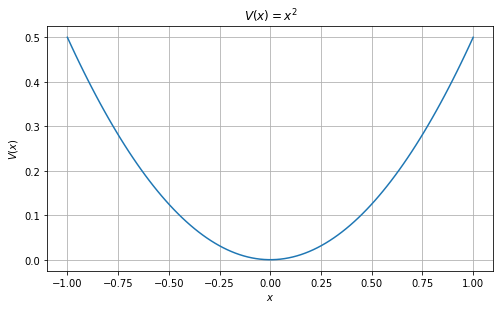

In [16]:
def f(x):
    V = 1/2 * x**2
    return V

x = np.linspace(-1, 1, 100)
V = f(x)

plt.figure(figsize=(8, 4.5))

plt.plot(x, V)
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title(r'$V(x) = x^2$')
plt.grid(True)
plt.show()

### Example 2.7.2

Graph the potential for the system: $\dot{x} = x - x^3$

*Solution:*

$-\frac{dV}{dx} = x-x^3$
$$V = -\frac{1}{2} x^2 + \frac{1}{4} x^4 + C$$

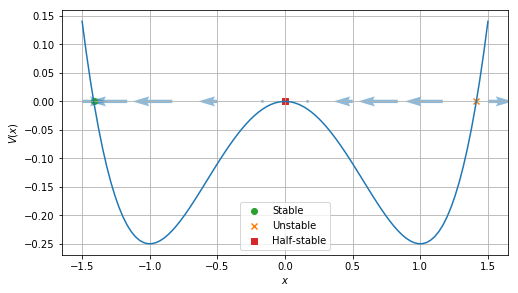

In [18]:
def f(x): 
    V = - 1/2 * x**2 + 1/4 * x**4
    return V

x = np.linspace(-1.5, 1.5, 100)
V = f(x)

stable, unstable = - np.sqrt(2), np.sqrt(2)
# unstable = 0

flow = np.linspace(-1.5, 1.5, 10)

# plt.quiver(x_f, np.repeat(0, len(x_f)), f(x_f), 0, alpha=.7)

plt.figure(figsize=(8, 4.5))

plt.plot(x, V)
plt.quiver(flow, np.repeat(0, len(flow)), f(flow), 0, color=c[0], alpha=.5)
plt.scatter(stable, f(stable), marker='o', label='Stable', c=c[2])
plt.scatter(unstable, f(unstable), marker='x', label='Unstable', c=c[1])
plt.scatter(0, f(0), marker='s', label='Half-stable', c=c[3])
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.legend(loc='best')
plt.grid(True)

plt.show()

## 2.8 Solving Equations on the Computer
---

- graphical
- analytical 
- **numerical method**


**numerical intergration**


### Euler's Method

$$\dot{x} = f(x)$$

$$\begin{align*}
x(t_0 + \Delta t) &\approx x_1 \\
&= x_0 + f(x_0) \Delta t
\end{align*}$$

$$x_{n+1} = x_n + f(x_n) \Delta t$$

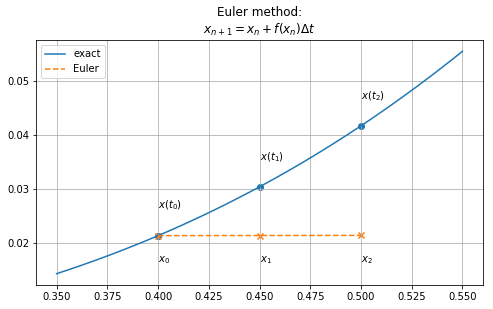

In [21]:
"""
dx/dt = f(x) = x**(-1/2)
x(t) = F(x) = 2 * x**(1/2)
euler:
    x_n+1 = x_n + f(x_n)Δt
"""


def f(x):
    y = x**2
    return y

def F(x):
    y = 1/3 * x**3
    return y

def euler(x0, n, t):
    x = np.array([x0])
    
    for i in range(n):
        x_n = x[i]
        x_n1 = x_n + f(x_n) * t
        x_n1 = np.array([x_n1])
        x = np.append(x, x_n1)
    
    return x

x = np.linspace(0.35, 0.55, 100)

t = np.arange(0.4, 0.51, 0.05)

label = np.array([r'$x(t_0)$', r'$x(t_1)$', r'$x(t_2)$'])
label_2 = np.array([r'$x_0$', r'$x_1$', r'$x_2$'])

plt.figure(figsize=(8, 4.5))

plt.plot(x, F(x), label='exact', c=c[0])

# exact
for t_i, l_i in zip(t, label):
    plt.scatter(t_i, F(t_i), c=c[0])
    plt.text(t_i, F(t_i)+0.005, l_i)

eul = euler(F(0.4), 2, 0.05)

for t_i, l_i, eul_i in zip(t, label_2, eul):
    plt.scatter(t_i, eul_i, c=c[1], marker='x')
    plt.text(t_i, eul_i-0.005, l_i)
    
plt.plot(t, eul, c=c[1], label='Euler', linestyle=l[1])
plt.legend(loc='best')
plt.grid(True)
plt.title('Euler method:\n' r'$x_{n+1}=x_n+f(x_n)\Delta t$')
plt.show()

# x_n1 = euler(0.4, 2, 0.2)
# print(eul)

**fourth-order Runge-Kutta method**

$$
\begin{cases}
k_1 = f(x_n) \Delta t \\
k_2 = f(x_n + \frac{1}{2} k_1) \Delta t \\
k_3 = f(x_n + \frac{1}{2} k_2) \Delta t \\
k_4 = f(x_n + k_3) \Delta t \\
\end{cases} \\
x_{n+1} = x_n + \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
$$

In [12]:
def f(x):
    y = x ** 2
    return y

def RK(x0, n, t):
    x = np.array([x0])
    # y = np.array([])
    
    for i in range(n):
        x_n = x[i]
        
        k_1 = f(x_i) * t
        k_2 = f(x_i + k_1/2) * t
        k_3 = f(x_i + k_2/2) * t
        k_4 = f(x_i + k_3) * t
        
        x_n1 = x_n + 1/6 *(k_1 + k_2*2 + k_3*2 + k_4)
        x_n1= np.array([x_n1])
        x = np.append(x, x_n1)
        
    return x



t = np.linspace(0.1, 1, 100)

x_RK = RK(0.1, 0.1, 10)
t_RK = np.linspace(0.1, 1.0, 10)

plt.plot(t, f(t))
plt.plot(t_RK, x_RK)

plt.show()

TypeError: 'float' object cannot be interpreted as an integer

### Example 2.8.1

Solve the system $\dot{x} = x (1 - x)$ numerically

*Solution:*



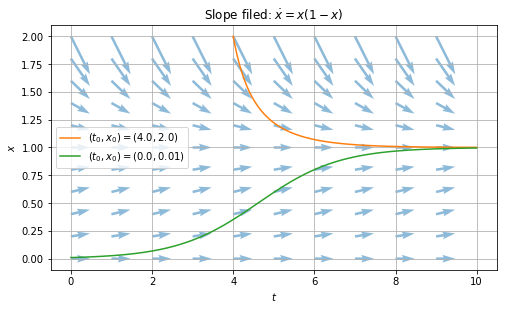

In [20]:
def f(x):
    y = x - x**2
    return y

def slope(x0, t0, dt, iteration):
    
    x = np.array([x0])
    t = np.array([t0])
    
    for i in range(iteration):
        xi = x[i]
        ti = t[i]
        x = np.append(x, np.array([xi + f(xi)/100]))
        t = np.append(t, np.array([ti+dt]))
    return x, t
    
    
t, x = np.arange(0, 10, 1), np.arange(0, 2.1, 0.2)
T, X = np.meshgrid(t, x)
flow = f(x)
Flow = np.tile(flow, (10, 1))
Flow = np.transpose(Flow)

plt.figure(figsize=(8, 4.5))

plt.quiver(T, X, np.repeat(1, len(x)*len(t)), Flow, color=c[0], alpha=.5)

x_slope, t_slope = slope(2, 4, 0.01, 600)
plt.plot(t_slope, x_slope, c=c[1], label=r'$(t_0, x_0)=(4.0,2.0)$')

x_slope, t_slope = slope(0.01, 0, 0.01, 1000)
plt.plot(t_slope, x_slope, c=c[2], label=r'$(t_0, x_0)=(0.0,0.01)$')

plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title('Slope filed: ' r'$\dot{x} = x(1-x)$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# print(T.shape)
# print(X.shape)
# print(x_slope)
# print(t_slope.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = x * (x + 1) *(x - 1)
    return y

def flow(x1, x2, num):
    x_flow = np.linspace(x1, x2, num)
    y_flow = np.repeat(0, len(x_flow))
    l_flow = f(x_flow)
    plt.quiver(x_flow, y_flow, l_flow, 0)

def plot_fx(x1, x2, num):
    x = np.linspace(x1, x2, num)
    y = f(x)
    plt.plot(x, y)

plot_fx(-1.1, 1.1, 100)
flow(-1.1, 1.1, 10)

stable = 0
unstable = [-1, 1]

def plot_stable(stable):
    plt.scatter(stable, f(stable), label='stable', marker='o')

def plot_unstable(unstable):
    plt.scatter(unstable, f(unstable), label='unstable', marker='x')
    
plot_stable(stable)
plot_unstable(unstable)
    
plt.title('')
plt.xlabel('')
plt.ylabel('')
# plt.legend(loc='upper right')
plt.grid(True)
plt.show()

---
**Overview**

- [2.0 Introduction](#2.0-Introduction)
- [2.1 A Geometric way of Thinking](#2.1-A-Geometric-way-of-Thinking)
- [2.2 Fixed Points and Stability](#2.2-Fixed-Points-and-Stability)
    - [Example 2.2.1](#Example-2.2.1)
    - [Example 2.2.2](#Example-2.2.2)
    - [Example 2.2.3](#Example-2.2.3)
- [2.3 Population Growth](#2.3-Population-Growth)
    - [Critique of the Logistic Model](#Critique-of-the-Logistic-Model)
- [2.4 Linear Stability Analysis](#2.4-Linear-Stability-Analysis)
    - [Example 2.4.1](#Example-2.4.1)
- [2.5 Existence and Uniquness](#2.5-Existence-and-Uniquness)
    - [Example 2.5.1](#Example-2.5.1)
    - [Example 2.5.2](#Example-2.5.2)
- [2.6 Impossibility of Oscillations](#2.6-Impossibility-of-Oscillations)
    - [Mechanical Analog: Overdamped Systems](#Mechanical-Analog:-Overdamped-Systems)
- [2.7 Potentials](#2.7-Potentials)
    - [Example 2.7.1](#Example-2.7.1)
- [2.8 Solving Equations on the Computer](#2.8-Solving-Equations-on-the-Computer)
    - [Euler's Method](#Euler's-Method)